# Data visualization with Python

This notebook will gather some notes taken during the course "Data visualization with Python" from Coursera.

## Syllabus

### Week 1 - Introduction to Data Visualization Tools
* Introduction to Data Visualization
* Introduction to Matplotlib
* Basic Plotting with Matplotlib
* Dataset on Immigration to Canada
* Line Plots
* Lab: Introduction to Matplotlib and Line Plots
* Quiz: Introduction to Data Visualization Tools

### Week 2 - Basic and Specialized Visualization Tools
* Area Plots
* Histograms
* Bar Charts
* Pie Charts
* Box Plots
* Scatter Plots
* Bubble Plots
* Lab: Basic Visualization Tools
* Lab: Specialized Visualization Tools
* Quiz: Basic Visualization Tools
* Quiz: Specialized Visualization Tools

### Week 3 - Advanced Visualizations and Geospatial Data
* Waffle Charts
* Word Clouds
* Seaborn and Regression Plots
* Introduction to Folium and Map Styles
* Maps with Markers
* Choropleth Maps
* Lab: Advanced Visualization Tools
* Lab: Creating Maps and Visualizing Geospatial Data
* Quiz: Advanced Visualization Tools
* Quiz: Visualizing Geospatial Data
* Peer-review Assignment

### Week 1 - Introduction to Data Visualization Tools
Throughout this course we're gonna learn how to create meaningful, effective, and aesthetically pleasing data visuals and plots in python using Matplotlib and a couple of other libraries namely Seaborn and Folium.

#### Matplotlib

Matplotlib structure:
* Back-end layer
    - FigureCanvas - Define the drawn area
    - Renderer - How to draw on the figure canvas
    - Event - Handles user inputs
* Artist layer - Made for developers
    - Artist - Use the Renderer to put ink on the canvas
        - Lines, dot, ...
        - Figure and axes
* Scripting layer - Scientist who are not programmers. It is the pyplot interface wich automates the process of defining a canvas and defining a figure artist instance and connecting them.

Once a figure has been rendered (plt.show()), it cannot be edited. It should be rendered again. It would be possible to use the back-edn (magic) %matplotlib notebook.
%matplotlib inline enforces plots to be rendered within the browser.

#### Line, area and histogram plots
Let's use a dataset of migration to Canada

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
df_can.index.name = None # Remove the name of the index
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


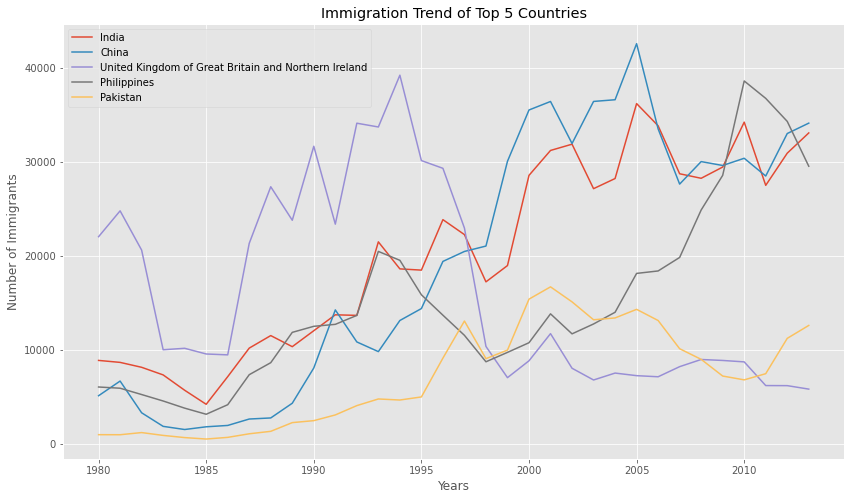

In [4]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_five = df_can.head(5)
df_five = df_five.loc[:, years].transpose()
df_five.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Area charts

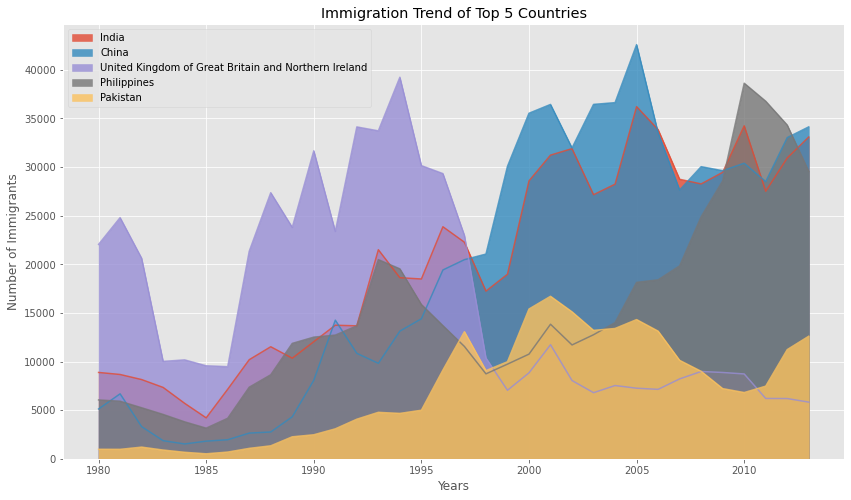

In [5]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_five = df_can.head(5)
df_five = df_five.loc[:, years].transpose()
df_five.plot(kind='area', figsize=(14, 8), stacked=False, alpha = 0.8)
# Try playing with the parameters stacked and alpha

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Bar charts

Text(0, 0.5, 'Number of countries')

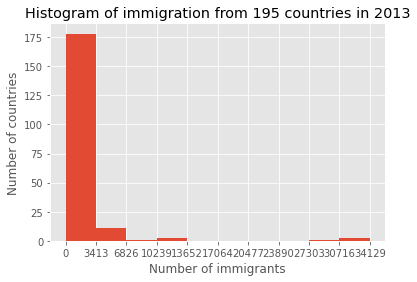

In [6]:
import numpy as np

count, bin_edges = np.histogram(df_can['2013'])
df_can['2013'].plot(kind='hist', xticks = bin_edges)

plt.title('Histogram of immigration from 195 countries in 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')

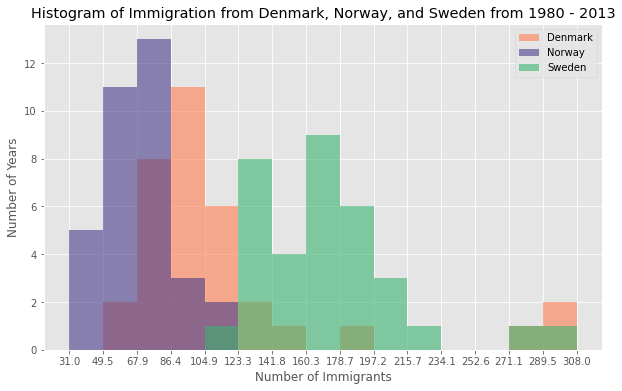

In [7]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Horizontal bar charts.
Some annotations or arrows can be included. Let's use a bar char for annotations

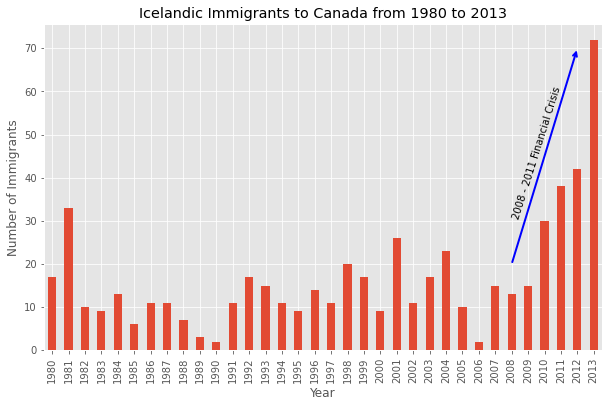

In [8]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

Horizontal bar charts

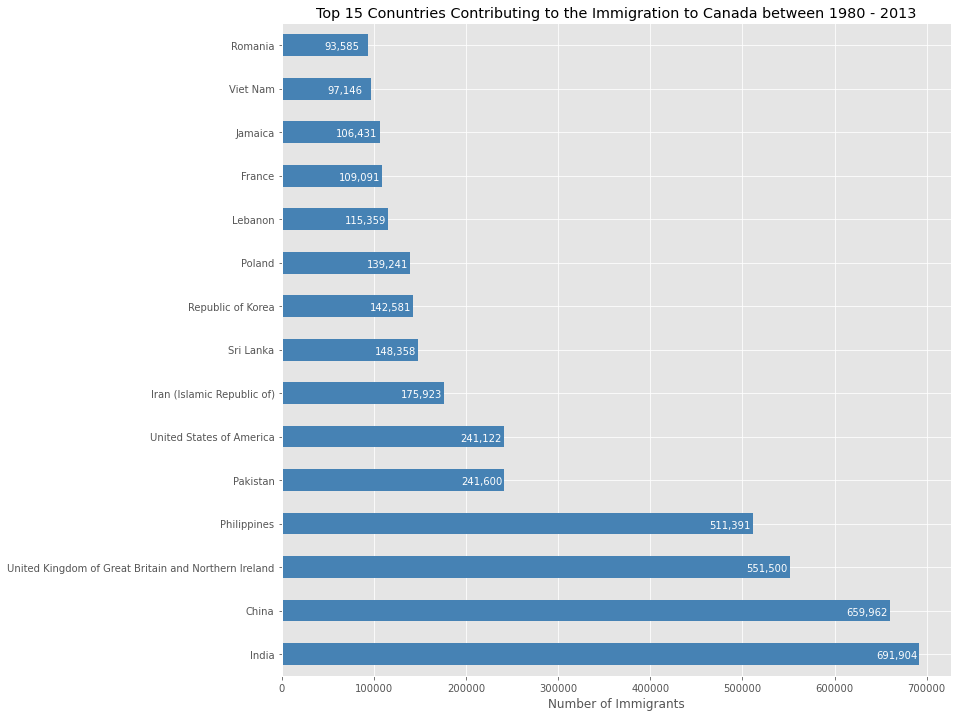

In [9]:
df_can.sort_values(by='Total', ascending=False, inplace=True)
df_top15 = df_can['Total'].head(15)

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Week 2 - Pie charts, boxplots, scatter plots
#### Pie charts

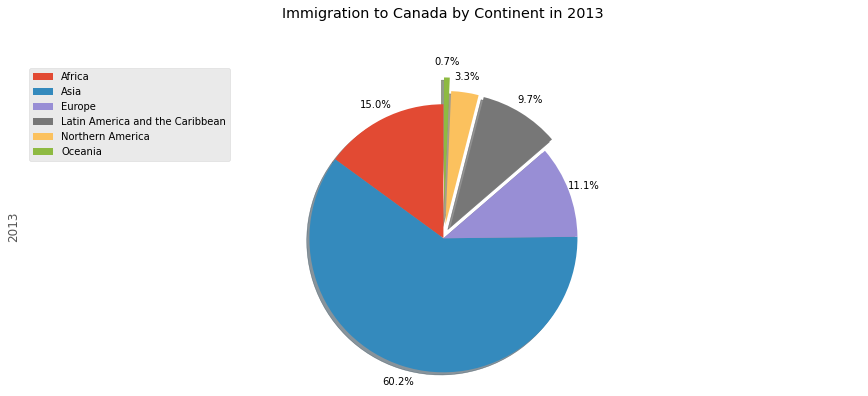

In [10]:
df_continents = df_can.groupby('Continent', axis=0).sum()
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

#### Box plots
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

* Minimum: The smallest number in the dataset excluding the outliers.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: The largest number in the dataset excluding the outliers.

In [11]:
df_CI = df_can.loc[:, years].head(8).transpose()

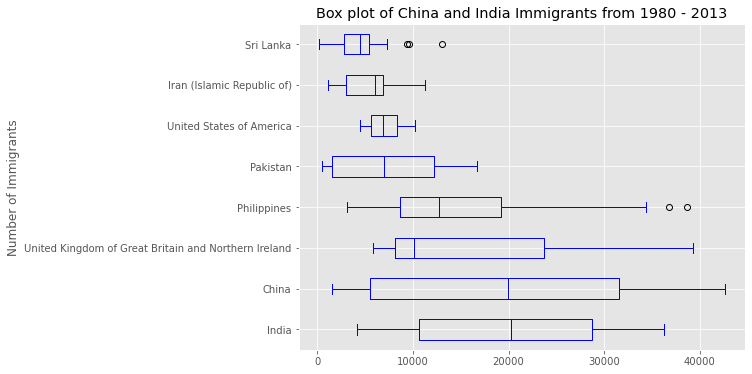

In [12]:
df_CI.plot(kind='box', figsize=(8, 6), color='blue', vert=False)

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

#### Subplots

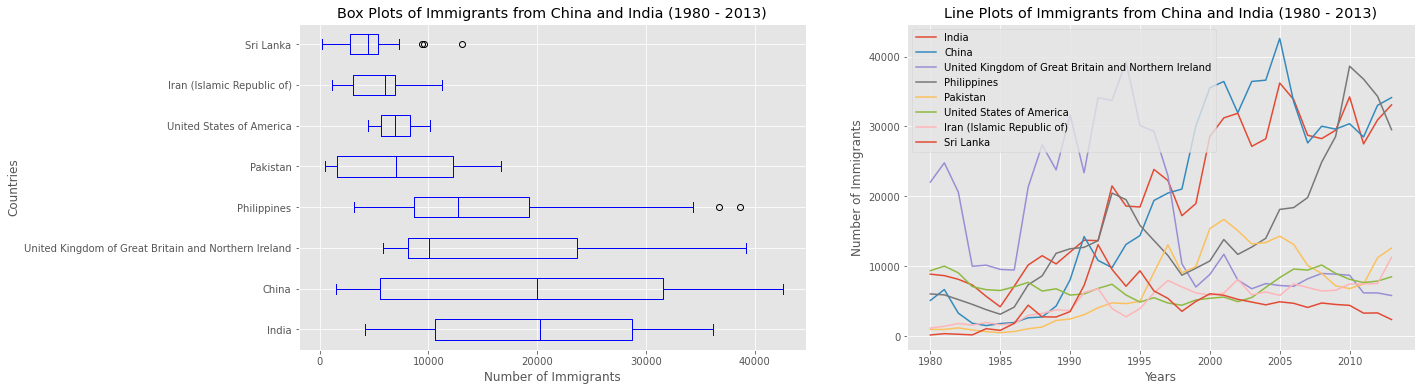

In [13]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

#### Scatter plots

In [14]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']

In [15]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

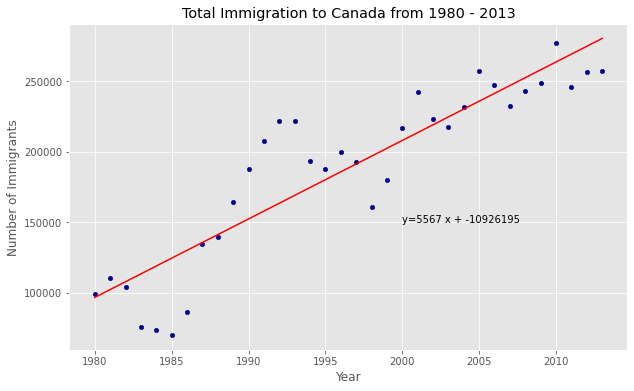

'No. Immigrants = 5567 * Year + -10926195'

In [16]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Lets use now a bubble plot

In [17]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

In [18]:
# Feature scaling
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

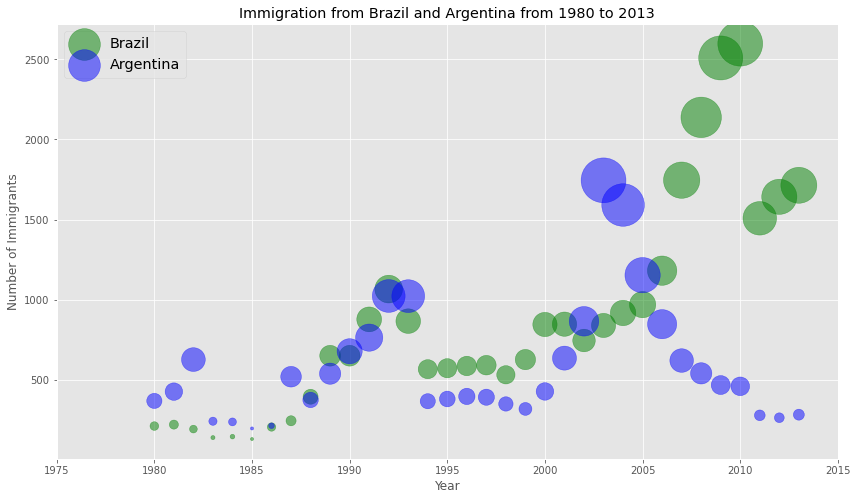

In [19]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

### Week 3 - Advanced Visualizations and Geospatial Data
#### Waffle charts

In [20]:
import matplotlib.patches as mpatches # needed for waffle Charts

df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

In [21]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

In [22]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

In [23]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class
create_waffle_chart(categories, values, height, width, colormap)

#### Word clouds


In [24]:
!pip3 install wordcloud

In case the standard installation does not work properly, install it manually.
* Get the path of the python executable
* Manually construct the string to install the package

In [25]:
# import sys
# print(sys.executable)

In [26]:
# !/home/jupyterlab/conda/envs/python/bin/python -m pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS
import urllib
import numpy as np
from PIL import Image # converting images into arrays
from matplotlib import pyplot as plt

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")
stopwords = set(STOPWORDS)
stopwords.add('said') # add the words said to stopwords

alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

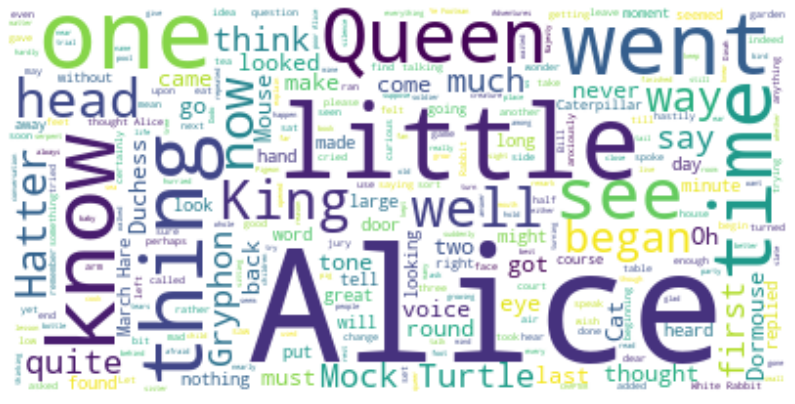

In [28]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

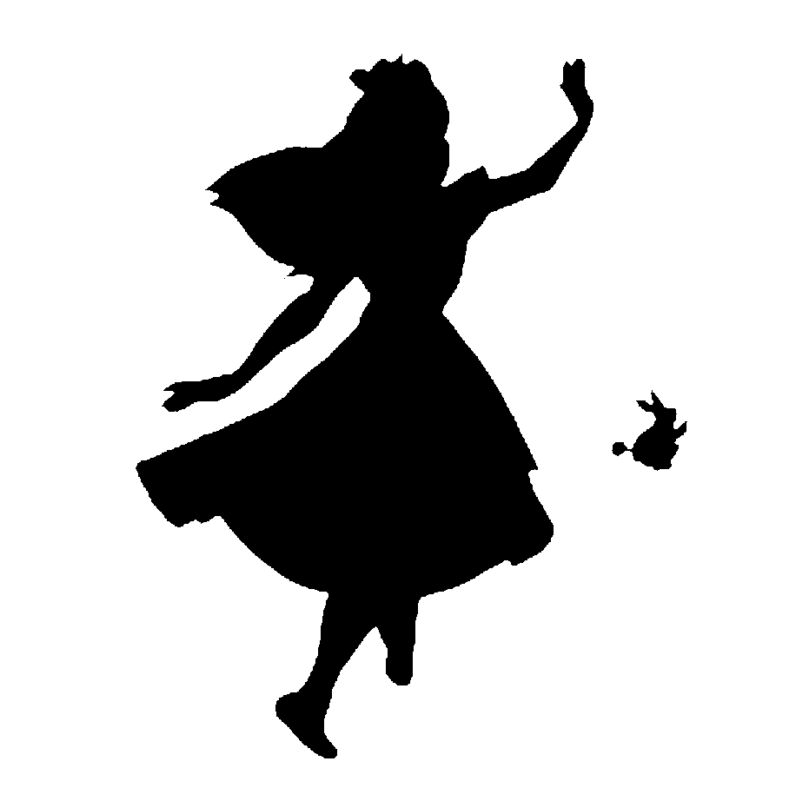

In [29]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

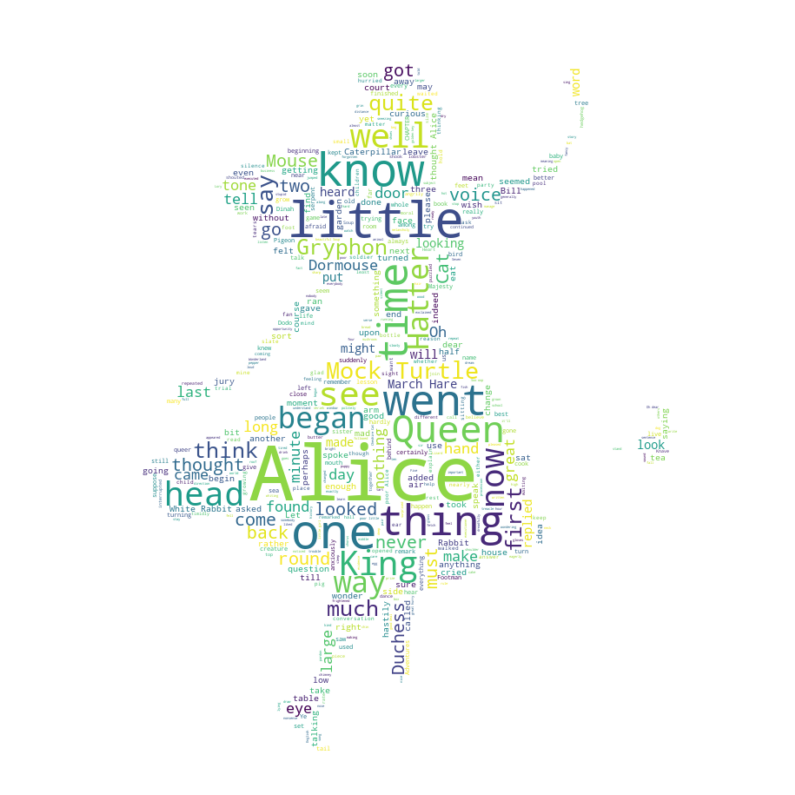

In [30]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
total_immigration = df_can['Total'].sum()

In [32]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

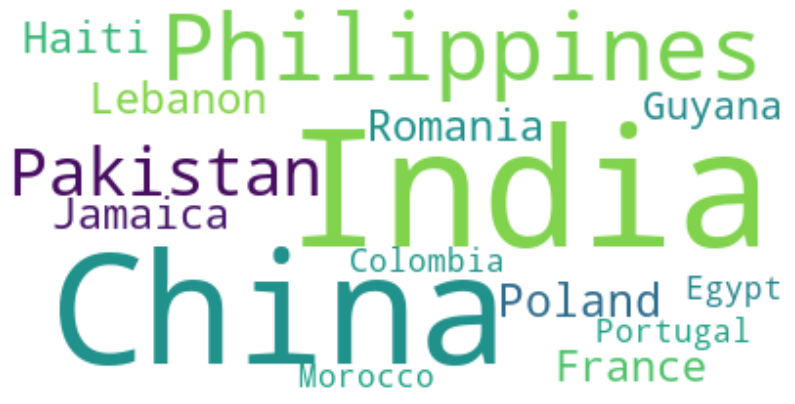

In [33]:
wordcloud = WordCloud(background_color='white').generate(word_string)
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Regression plots

In [34]:
# ! pip3 install seaborn
import seaborn as sns

In [35]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

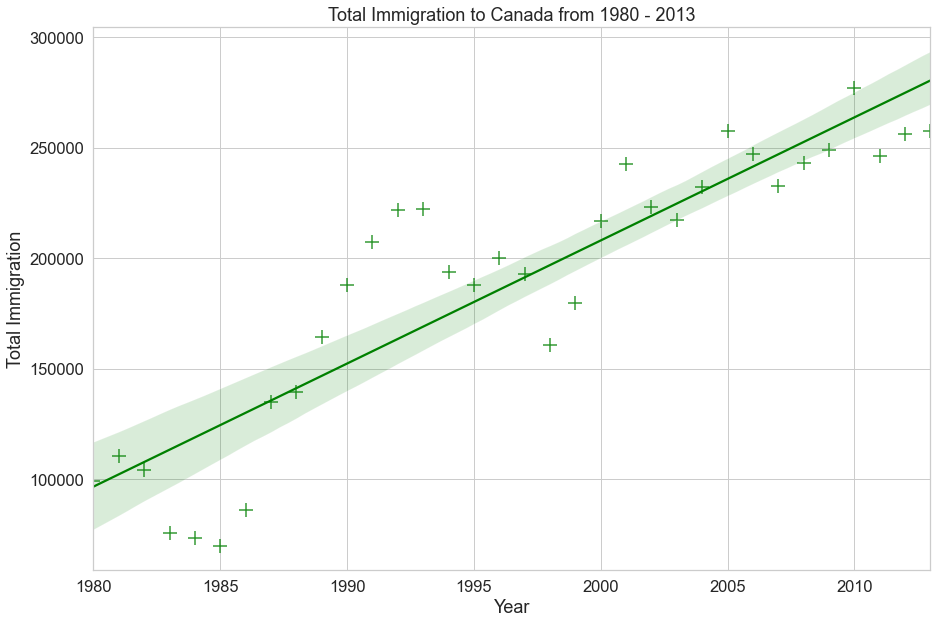

In [36]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

#### Folium
Folium is a powerful data visualization library in Python that was built primarily to help people visualize geospatial data. With Folium, you can create a map of any location in the world as long as you know its latitude and longitude values. You can also create a map and superimpose markers as well as clusters of markers on top of the map for cool and very interesting visualizations. You can also create maps of different styles.

In [37]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [38]:
# define the world map
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4,  tiles='Stamen Terrain')

# display world map
world_map

In [39]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [40]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [41]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [42]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [43]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [44]:
!pip3 install openpyxl
!pip3 install wget

In [45]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

In [46]:
# download countries geojson file
import urllib, json
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

In [47]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=data,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

### W04 - Creating Dashboards with Plotly and Dash
#### Dashboarding overview
Dash is a python framework for building web analytic applications. It is written on top of Flask, Plotly.js, and React.js. Dash is well-suited for building data visualization apps with highly custom user interfaces.

Panel works with visualizations from Bokeh, Matplotlib, HoloViews, and many other Python plotting libraries, making them instantly viewable either individually or when combined with interactive widgets that control them. Panel works equally well in Jupyter Notebooks, for creating quick data-exploration tools. Panel can also be used in standalone deployed apps and dashboards, allowing you to easily switch between those contexts as needed.

Voilà turns Jupyter notebooks into standalone web applications. It can be used with separate layout tools like jupyter-flex or templates like voila-vuetify.

Streamlit can easily turn data scripts into shareable web apps with 3 main principles: embrace python scripting, treat widgets as variables, and reuse data and computation.

There are other tools that can be used for dashboarding:
Bokeh is a plotting library, a widget and app library. It acts as a server for both plots and dashboards. Panel is one of the web-based dashboarding tools built on Bokeh. ipywidgets provides an array of Jupyter-compatible widgets and an interface supported by many Python libraries, but sharing as a dashboard requires a separate deployable server like Voila.
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
Bowtie allows users to build dashboards in pure Python.

Flask is a Python-backed web server that can be used to build arbitrary web sites, including those with Python plots that function as flask dashboards.

https://pyviz.org/dashboarding/

#### Plotly basics: scatter, line, bar, bubble, histogram, pie, sunburst

*   [Plotly python](https://plotly.com/python/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Graph Objects](https://plotly.com/python/graph-objects/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Express](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Basic charts](https://plotly.com/python/basic-charts/)


In [48]:
!pip3 install plotly

In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [50]:
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})
data = airline_data.sample(n=500, random_state=42)

Scatter plot

In [51]:
fig = go.Figure(data=go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
fig.show()

Line chart

In [52]:
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()
fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()

Bar chart

In [53]:
bar_data = data.groupby(['DestState'])['Flights'].sum().reset_index()
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

Buble chart

In [54]:
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights",
                 size="Flights", hover_name="Reporting_Airline", size_max=60)
fig.update_layout(title='Reporting Airline vs Number of Flights', xaxis_title='Reporting_Airline', yaxis_title='Flights')
fig.show()

Histogram charts

In [55]:
data['ArrDelay'] = data['ArrDelay'].fillna(0)
fig = px.histogram(data, x="ArrDelay")
fig.show()

Pie charts

In [56]:
fig = px.pie(data, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

Sunburst charts

In [57]:
fig =px.sunburst(
    data, path=['Month', 'DestStateName'], values='Flights')
fig.show()

#### Dash components
The following code shall be saved in a python (*.py) file and executed by:

python3 dash_basics.py

After the execution, open it in a browser.
Anyway, it can also be executed in a ad-hoc jupyter notebook and open the final ip.

For additional information related to dash, refer to the following sources:

*   [Complete dash user guide](https://dash.plotly.com/)
*   [Related blogs](https://medium.com/plotly/tagged/dash)

#### Make dashboards interactive

A callback function is a python function that is automatically called by Dash whenever an input component's property changes. Callback function is decorated with `@app.callback` decorator.

Basically, whenever there is a change in the input component value, callback function wrapped by the decorator is called followed by the update to the output component children in the application layout.

Decorate the callback function with @app.callback decorator. This takes two parameters. Output : This sets result returned from the callback function to a component id Input: This set input provided to the callback function to a component id From here we will connect input and output to desired properties.

[Python decorators reference 1](https://realpython.com/primer-on-python-decorators/)

[Python decorators reference 2](https://www.python.org/dev/peps/pep-0318/#current-syntax)

[Callbacks with example](https://dash.plotly.com/basic-callbacks)

[Dash app gallery](https://dash-gallery.plotly.host/Portal/)

[Dash community components](https://plotly.com/dash-community-components/)

#### User inputs and callbacks

#### Final assignment